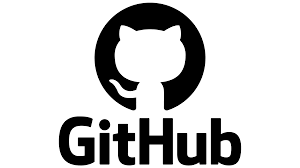



## Scraping Top Repositories for Topics on GitHub

Web scraping: Web scraping is the process of extracting and parsing data from websites in an automated fashion using a computer               program. It's a useful technique for creating datasets for research and learning.

Todo: Scrape the top repositories for  each topics on Github by the use of python built-in libraries:
 -  pandas
 -  requests
 -  Beautifulsoup
 -  os

# Scrape the list of topics from Github
Explain how you'll do it.

- use requests to downlaod the page
- user BS4 to parse and extract information
- convert to a Pandas dataframe
- Let's write a function to download the page.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os

In [2]:
def get_topic_file(topic_url):
    response=requests.get(topic_url)
    if response.status_code!=200:
        raise Exception(f'Failed to load page {topic_url}')
    topic_desc=BeautifulSoup(response.text,'html.parser')
    return topic_desc

In [3]:
describe=get_topic_file('https://github.com/topics')

Let's create some helper functions to parse information from the page.

To get topic titles, we can pick `p` tags with the `class` ...

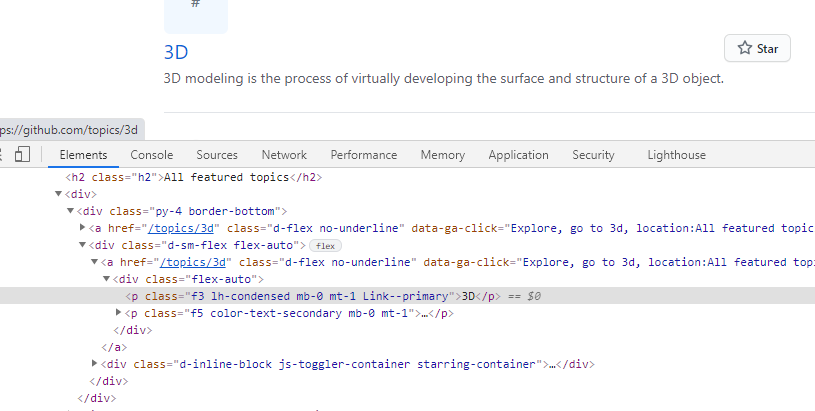


In [4]:
def get_topic_titles(doc):
    selection_class = 'f3 lh-condensed mb-0 mt-1 Link--primary'
    topic_title_tags = doc.find_all('p', {'class': selection_class})
    topic_titles = []
    for tag in topic_title_tags:
        topic_titles.append(tag.text)
    return topic_titles

`get_topic_titles()` can be used to get the list of titles

In [5]:
title=get_topic_titles(describe)

In [6]:
len(title)

30

In [7]:
title[:5]

['3D', 'Ajax', 'Algorithm', 'Amp', 'Android']

Similarly we have defined functions for descriptions and URLs.

In [8]:
def get_topic_descs(doc):
    desc_selector = 'f5 color-text-secondary mb-0 mt-1'
    topic_desc_tags = doc.find_all('p', {'class': desc_selector})
    topic_descs = []
    for tag in topic_desc_tags:
        topic_descs.append(tag.text.strip())
    return topic_descs


`get_topic_descs()` can be used to get the list of titles description

In [34]:
topic_desc= get_topic_descs(describe)

In [35]:
len(topic_desc)

30

In [36]:
topic_desc[:5]

['3D modeling is the process of virtually developing the surface and structure of a 3D object.',
 'Ajax is a technique for creating interactive web applications.',
 'Algorithms are self-contained sequences that carry out a variety of tasks.',
 'Amp is a non-blocking concurrency framework for PHP.',
 'Android is an operating system built by Google designed for mobile devices.']

In [9]:
def get_topic_urls(doc):
    topic_link_tags = doc.find_all('a', {'class': 'd-flex no-underline'})
    topic_urls = []
    base_url = 'https://github.com'
    for tag in topic_link_tags:
        topic_urls.append(base_url + tag['href'])
    return topic_urls

`get_topic_urls` can be used to get the list of titles url

In [37]:
topic_url=get_topic_urls(describe)

In [38]:
topic_url[:5]

['https://github.com/topics/3d',
 'https://github.com/topics/ajax',
 'https://github.com/topics/algorithm',
 'https://github.com/topics/amphp',
 'https://github.com/topics/android']

#  Putting it all together
- We have a funciton to get the list of topics
- We have a function to create a CSV file for scraped repos from a topics page
- Let's create a function to put them together

In [39]:
def scrape_topics():
    topics_url = 'https://github.com/topics?page=1'
    response = requests.get(topics_url)
    if response.status_code != 200:
        raise Exception('Failed to load page {}'.format(topic_url))
    doc = BeautifulSoup(response.text, 'html.parser')
    topics_dict = {
        'title': get_topic_titles(doc),
        'description': get_topic_descs(doc),
        'url': get_topic_urls(doc)
    }
    return pd.DataFrame(topics_dict)

`scrape_topic` return the pandas dataframe which contain topic list'

In [46]:
topic=scrape_topics()
topic.to_csv('data/1topic.csv',index=None)
df=pd.read_csv('data/1topic.csv')
df.head(5)

,title,description,url
0,3D,3D modeling is the process of virtually develo...,https://github.com/topics/3d
1,Ajax,Ajax is a technique for creating interactive w...,https://github.com/topics/ajax
2,Algorithm,Algorithms are self-contained sequences that c...,https://github.com/topics/algorithm
3,Amp,Amp is a non-blocking concurrency framework fo...,https://github.com/topics/amphp
4,Android,Android is an operating system built by Google...,https://github.com/topics/android


# Get the top 30 repositories of each topic :

- Make a folder where all the csv file of 30 repositories are store
- Go throught the topic[URL] one by one
- Make a csv out of  each topic[URL] which contain(top 30 repositories):
  - Repositories name
  - Repositories Username
  - Repositories URL


In [18]:
def get_topic_page(topic_url):
    # Download the page
    response = requests.get(topic_url)
    # Check successful response
    if response.status_code != 200:
        raise Exception('Failed to load page {}'.format(topic_url))
    # Parse using Beautiful soup
    topic_doc = BeautifulSoup(response.text, 'html.parser')
    return topic_doc

`get_topic_page()` check topic[URL] page successfully

get=get_topic_page('https://github.com/topics/3d')

To get topic titles, we can pick h1 tags with the class ...

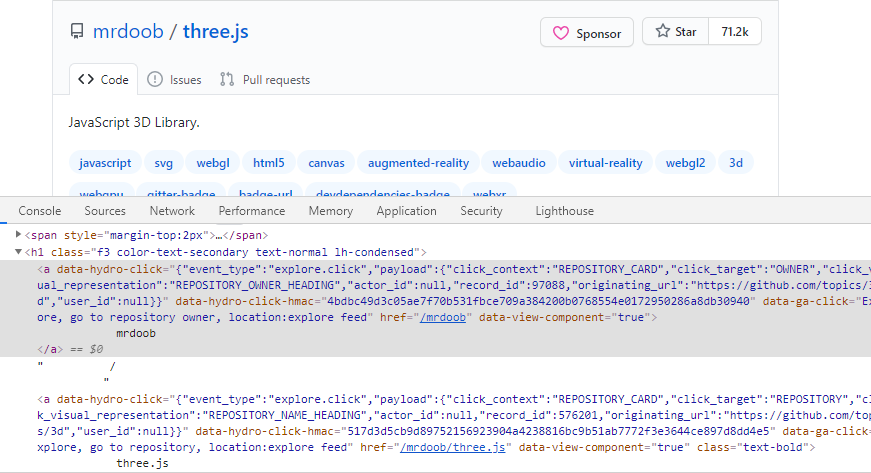

In [19]:
def get_repo_info(h1_tag, star_tag):
    # returns all the required info about a repository
    base_url = 'https://github.com'
    a_tags = h1_tag.find_all('a')
    username = a_tags[0].text.strip()
    repo_name = a_tags[1].text.strip()
    repo_url =  base_url + a_tags[1]['href']
    value = star_tag.text.strip()
    if value[-1]=='k':
        value=float(value[:-1])
    stars=int(value)*1000
    return username, repo_name, stars, repo_url

`get_repo_info()` return the username, repo_name, stars, repo_url

Explain:

In [52]:
response=requests.get('https://github.com/topics/3d')
response=BeautifulSoup(response.text,'html.parser')
h1_tag=response.find_all('h1',{'class':"f3 color-text-secondary text-normal lh-condensed"})
h1_star=response.find_all('a',{'class':"social-count float-none"})
h1_tag=h1_tag[0]
h1_star=h1_star[0]
print(get_repo_info(h1_tag,h1_star))

('mrdoob', 'three.js', 71000, 'https://github.com/mrdoob/three.js')


In [20]:
def get_topic_repos(topic_doc):
    # Get the h1 tags containing repo title, repo URL and username
    h1_selection_class = 'f3 color-text-secondary text-normal lh-condensed'
    repo_tags = topic_doc.find_all('h1', {'class': h1_selection_class} )
    # Get star tags
    star_tags = topic_doc.find_all('a', { 'class': 'social-count float-none'})
    
    topic_repos_dict = { 'username': [], 'repo_name': [], 'stars': [],'repo_url': []}

    # Get repo info
    for i in range(len(repo_tags)):
        repo_info = get_repo_info(repo_tags[i], star_tags[i])
        topic_repos_dict['username'].append(repo_info[0])
        topic_repos_dict['repo_name'].append(repo_info[1])
        topic_repos_dict['stars'].append(repo_info[2])
        topic_repos_dict['repo_url'].append(repo_info[3])
        
    return pd.DataFrame(topic_repos_dict)

`get_topic_repos` return the pandas dataframe 

In [ ]:
def scrape_topic(topic_url, path):
    if os.path.exists(path):
        print("The file {} already exists. Skipping...".format(path))
        return
    topic_df = get_topic_repos(get_topic_page(topic_url))
    topic_df.to_csv(path, index=None)

In [22]:
def scrape_topics_repos():
    print('Scraping list of topics')
    topics_df = scrape_topics()
    
    os.makedirs('data', exist_ok=True)
    for index, row in topics_df.iterrows():
        print('Scraping top repositories for "{}"'.format(row['title']))
        scrape_topic(row['url'], 'data/{}.csv'.format(row['title']))

In [30]:
scrape_topics_repos()

Scraping list of topics
Scraping top repositories for "Sketch"
Scraping top repositories for "SpaceVim"
Scraping top repositories for "Spring Boot"
Scraping top repositories for "SQL"
Scraping top repositories for "Storybook"
Scraping top repositories for "Support"
Scraping top repositories for "Swift"
Scraping top repositories for "Symfony"
Scraping top repositories for "Telegram"
Scraping top repositories for "Tensorflow"
Scraping top repositories for "Terminal"
Scraping top repositories for "Terraform"
Scraping top repositories for "Testing"
Scraping top repositories for "Twitter"
Scraping top repositories for "TypeScript"
Scraping top repositories for "Ubuntu"
Scraping top repositories for "Unity"
Scraping top repositories for "Unreal Engine"
Scraping top repositories for "Vagrant"
Scraping top repositories for "Vim"
Scraping top repositories for "Virtual reality"
Scraping top repositories for "Vue.js"
Scraping top repositories for "Wagtail"
Scraping top repositories for "Web Compo

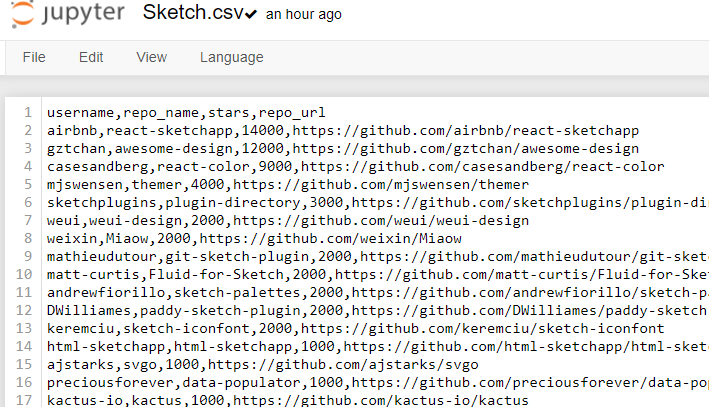